In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
Consumer_Key = "8gkozHxDwmXsvgLvqXMBWcx9T"
Consumer_Secret_Key = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
Access_Token = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
Access_Token_Secret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

In [5]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [34]:
posts = api.user_timeline(screen_name="axis", count = 1000, lang ="id", tweet_mode="extended")

# Print 30 tweet
print("Show the 30 recent tweets:\n")
i=1
for tweet in posts[:30]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 30 recent tweets:

1) This is the way the world ends
This is the way the world ends
This is the way the world ends
Not with a bang but a whimper.

2) @JeffBezos A permanent, safe, and centralized repository for nuclear waste.

3) Oh, the preparation and anticipation of attending my first Star Trek convention (as a lowly,… http://t.co/26urwzZsBo

4) 116° in #LasVegas today requires a tall cool lemonade from the friendly folks at #hotdogonastick :) @… http://t.co/bJM9eBT8rV

5) Stocked up on ammo for a day of target shooting in the Mojave tomorrow. http://t.co/zPZQse5fEF

6) #PreservationHall Jazz Band plus #DelMcCoury. It was an absolute pleasure tonight (and I walked away… http://t.co/q5Y0mysvKc

7) After running across this in the parking lot, I could now almost actually be persuaded to stick these… http://t.co/uRR7ZxZZcn

8) About to enter the darkness. Bring it on! #StarTrek #Tribbles @ AMC Town Square 18 http://t.co/nZgFaJFivE

9) $5 bargain DVD bin at Walmart. So wrong ye

In [18]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,This is the way the world ends\nThis is the wa...
1,"@JeffBezos A permanent, safe, and centralized ..."
2,"Oh, the preparation and anticipation of attend..."
3,116° in #LasVegas today requires a tall cool l...
4,Stocked up on ammo for a day of target shootin...


In [19]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,This is the way the world ends\nThis is the wa...
1,"A permanent, safe, and centralized repository..."
2,"Oh, the preparation and anticipation of attend..."
3,116° in LasVegas today requires a tall cool le...
4,Stocked up on ammo for a day of target shootin...
...,...
88,Sunday Forecast. Mostly Sunny. 98 Degrees.
89,Saturday Forecast. Sunny. 98 Degrees.
90,Friday Forecast. Sunny. 97 Degrees.
91,"L:Las Vegas, NV"


In [23]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,This is the way the world ends\nThis is the wa...,0.000000,0.000000
1,"A permanent, safe, and centralized repository...",0.250000,0.150000
2,"Oh, the preparation and anticipation of attend...",0.333333,0.250000
3,116° in LasVegas today requires a tall cool le...,0.716667,0.408333
4,Stocked up on ammo for a day of target shootin...,0.000000,0.000000
...,...,...,...
88,Sunday Forecast. Mostly Sunny. 98 Degrees.,0.500000,0.500000
89,Saturday Forecast. Sunny. 98 Degrees.,0.000000,0.000000
90,Friday Forecast. Sunny. 97 Degrees.,0.000000,0.000000
91,"L:Las Vegas, NV",0.000000,0.000000


<function matplotlib.pyplot.show>

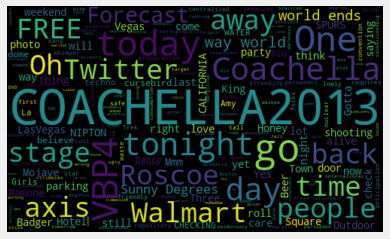

In [24]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [25]:
#Create a function to compute negative (-1), netral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,This is the way the world ends\nThis is the wa...,0.000000,0.000000,Netral
1,"A permanent, safe, and centralized repository...",0.250000,0.150000,Positive
2,"Oh, the preparation and anticipation of attend...",0.333333,0.250000,Positive
3,116° in LasVegas today requires a tall cool le...,0.716667,0.408333,Positive
4,Stocked up on ammo for a day of target shootin...,0.000000,0.000000,Netral
...,...,...,...,...
88,Sunday Forecast. Mostly Sunny. 98 Degrees.,0.500000,0.500000,Positive
89,Saturday Forecast. Sunny. 98 Degrees.,0.000000,0.000000,Netral
90,Friday Forecast. Sunny. 97 Degrees.,0.000000,0.000000,Netral
91,"L:Las Vegas, NV",0.000000,0.000000,Netral


In [26]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  A permanent, safe, and centralized repository for nuclear waste.

2) Oh, the preparation and anticipation of attending my first Star Trek convention (as a lowly,… 

3) 116° in LasVegas today requires a tall cool lemonade from the friendly folks at hotdogonastick :) @… 

4) PreservationHall Jazz Band plus DelMcCoury. It was an absolute pleasure tonight (and I walked away… 

5) This the only time I've ever experienced a deserted Alamo ...probably because I snapped this… 

6) Fresh homemade margaritas and streettacos at our casa today for cincodemayo 

7) Okay people, this is the  meme. I'm the second person through the door at this party.… 

8) Trampoline action at SkyZone tonight. @ Sky Zone 

9) Mmm mmm good! Cocktails Dark&amp;Stormy 

10) Thanks seebee5 ...your donation to the junkyard is mucho appreciated! Cars Pixar TowMater 

11) Apparently these days you just have to know that this is the MadGreek in Baker, California. @ The Mad… 

12) Free Beer Mot

In [27]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) $5 bargain DVD bin at Walmart. So wrong yet so right. Deliverance Walmart squeallikeapig @ Walmart… 

2) DogShit "Not for Human Consumption. We don't care how ugly you are." TexasHumor 

3) This is how we prepare for a SPURS game at my house. TEQUILA CHALUPAS DOSEQUIS Go Spurs Go!… 

4) I'm nostalgic for when RollingRock used to screen print directly on the bottle. These days it's just… 

5) Very Bad Poetry 4  ( tonight! Shooting glasses - check, vintage cowboy hat -… 

6) iranelection I'm deep in the shit. The VC are everywhere! Chewbacca's got my back.

7) Twitter is for losers.

8) Watched the South Park / Jonas Bros / Disney episode, where Mickey stated: "Christians are retarded! They believe in a talking dead guy!"

9) Unfortunately, I'm back on this magnet for extreme narcissism!

10) We're in the dome with Cut Chemist and his dad. I think there should be some thumpin bass.

11) Believe it or not ...Ron Jeremy checking out Amy Winewise. Weird. Random

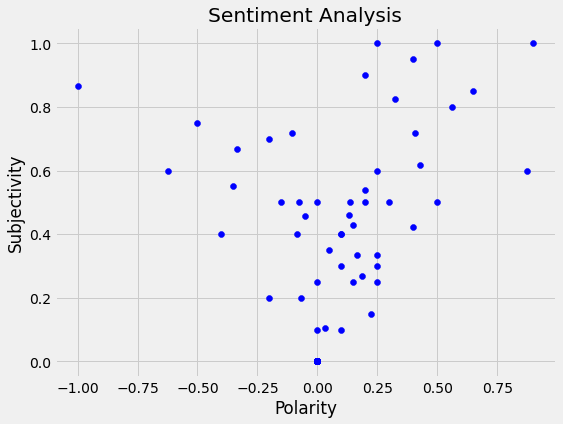

In [28]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [29]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

35.5

In [30]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.1

In [31]:
# Show the value counts
df['Analysis'].value_counts()

Netral      46
Positive    33
Negative    14
Name: Analysis, dtype: int64

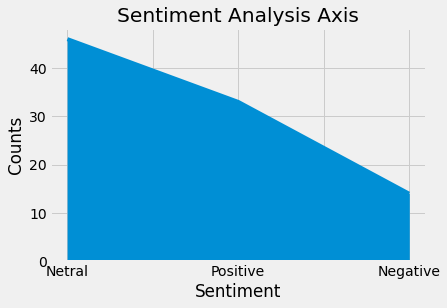

In [35]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Axis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()